In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

In [37]:
def p1(p, draw=True):
    G = nx.Graph()
    G.add_nodes_from(np.arange(10) + 1) # Create 10 node isolated network

    for n1 in G:
        for n2 in G:
            if n1 >= n2:
                continue
            if np.random.random() < p:
                G.add_edge(n1, n2)

    if draw:
        nx.draw(G)

    try:
        nx.find_cycle(G)
        print('Has Cycles?     ', True)
    except nx.NetworkXNoCycle:
        print('Has Cycles?     ', False)

    print('Average Degree: ', np.mean(G.degree))
    print('Is Connected?   ', nx.is_connected(G))

    return G


Has Cycles?      True
Average Degree:  3.65
Is Connected?    False


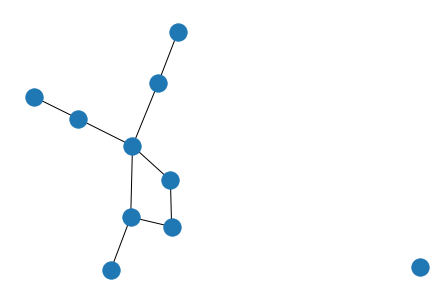

In [38]:
g_p1a = p1(1/6)

Has Cycles?      True
Average Degree:  4.25
Is Connected?    True


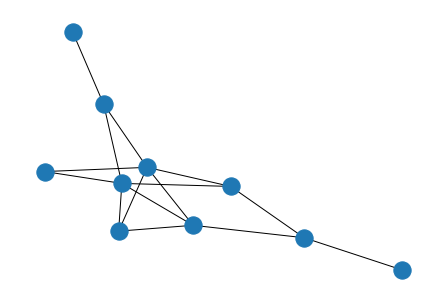

In [39]:
g_p1b = p1(2/6)

In [40]:
nx.write_gexf(g_p1a, 'p1a.gexf')
nx.write_gexf(g_p1b, 'p1b.gexf')

Gephi Stuff:

Graph 1
---
Number of unreachable pairs of nodes: 9
Unreachable pairs of nodes:
(8,1)
(8,2)
(8,3)
(8,4)
(8,5)
(8,6)
(8,7)
(8,9)
(8,10)

Average distance among reachable pairs: 2.3333

Network Diameter: 4

Clustering Coeff: 0 (no triangles)



Graph 2
---
Number of unreachable pairs of nodes: 0
Unreachable pairs of nodes: None

Average distance among reachable pairs:
2.067

Network Diameter: 5

Clustering Coeff: 0.15

# Problem 2

a) Degree Distrubition is in img

b) Average path length: 2.486
    Diameter: 5
    The average path length is roughly half the diameter
    ln(n)/ln(k) = ln(16)/ln(2.5) ~= 3.0
    Can observe some type of small world behavior but the degree distribution does not support this

c) Important nodes by betweeneness and centrality:
    Medici 95.0 / 12
    Guadagni 46.33 / 8
    Albizzi 38.66 / 6
    Salivati 26.0 / 4
    Ridolfi 20.66 / 6

    We can see that while higher degree usually implies higher betweeness centrality, this is not the case for salivati.
    Salivati has a lower degree, but a higher betweenness centrality than ridolfi.

    Despite Salivati only being connected to medici and pazzi, it is also the only node to be connected to Pazzi. Thus, when calculating the betweenness centrality for all nodes, salviati will lie on every shortest path to pazzi.
    This is not the case for ridolfi, which can be avoided for all of the nodes it is connected to, hence it may not exist on the shortest path.

# Problem 3

a) Avg Degree: 6.459
    Path Length - 6.04
    Diameter - 17
    CC: 0.665

In [3]:
G = nx.read_gml('./arx_test.gml')

In [4]:
degree = np.asarray(G.degree, dtype='int')[:,1] # Select all the degrees
degree = np.sort(degree)

In [14]:
d[0]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 53, 54,
       55, 56, 57, 59, 60, 62, 63, 65, 66, 68, 77, 79, 81], dtype=int64)

Text(0.5, 0, 'Degree')

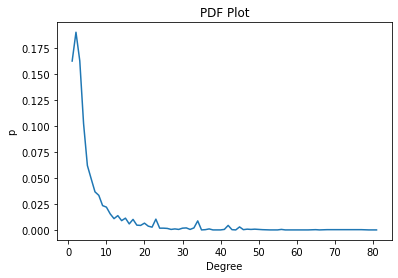

In [16]:
d = np.asarray(np.unique(degree, return_counts=True))

plt.title('PDF Plot')
plt.plot(d[0], d[1] / d[1].sum())
plt.ylabel('p')
plt.xlabel('Degree')

Text(0.5, 0, 'Rank (log)')

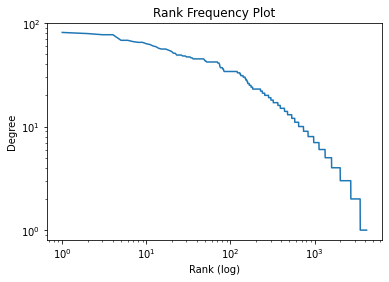

In [61]:
# Rank Frequency Plot

degree = np.asarray(G.degree, dtype='int')[:,1] # Select all the degrees
degree = np.sort(degree)[::-1] # Reverse Sort degrees
rank = np.arange(len(degree)) + 1
d = np.column_stack([rank, degree])

plt.title('Rank Frequency Plot')
plt.loglog(d[:,0], d[:,1])
plt.ylabel('Degree')
plt.xlabel('Rank (log)')

In [76]:
random_exp = np.random.exponential(6.459, 5000)

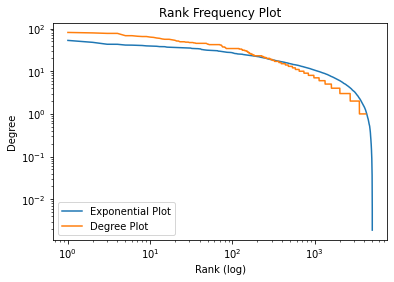

In [77]:
random_exp = np.sort(random_exp)[::-1] # Reverse Sort degrees
rank = np.arange(len(random_exp)) + 1
d_exp = np.column_stack([rank, random_exp])

plt.title('Rank Frequency Plot')
plt.loglog(d_exp[:,0], d_exp[:,1], label='Exponential Plot')
plt.loglog(d[:,0], d[:,1], label='Degree Plot')
plt.ylabel('Degree')
plt.xlabel('Rank (log)')
plt.legend()

### Compare these two plots
We can see that the exponential numbers

### What kind of network is this?

This network seems to be best classified as a power law as we can observe a roughly linear relationship between rank and degree in log log scale. However the network seems to have an inflated number of middling degree nodes, whereas a more typical power law network would have a sharper drop off in degree (and therefore a stronger linear relationship)

# Problem 4

In [159]:
def create_network(p=0, N=100):
    G = nx.Graph()
    
    G.add_nodes_from(np.arange(N)) # Add N Nodes to the graph
    edge_list = []
    for i in range(len(G.nodes)):
        dns = [-2, -1, 1, 2]
        for dnc in dns:
            if np.random.random() < p:
                # Rewire randomly
                dnc = np.random.randint(N)

            neighbor_node_coords = (i + dnc) % N

            # Create normal connection (With either randomly selected neighbor or structural neighbor)
            edge_list.append((i, neighbor_node_coords))

    G.add_edges_from(edge_list)

    return G



In [179]:
def problem4(show=True):
    

    # Create list of probas
    probas = []
    i = 0.0001
    while i < 1:
        probas.append(i)
        i *= 5
        probas.append(i)
        i *= 2
    probas.append(1.0)

    G_0 = create_network(0)
    C_0 = nx.average_clustering(G_0)
    L_0 = nx.average_shortest_path_length(G_0)
    fig, ax = plt.subplots()
    ax.set_title('Problem 4')
    ax.set_xlabel('p')
    c = np.array([])
    l = np.array([])
    for p in probas:

        G = create_network(p)
        C_p = nx.average_clustering(G)
        L_p = nx.average_shortest_path_length(G)
        c = np.append(c, [C_p])
        l = np.append(l, [L_p])
    c /= C_0
    l /= L_0
    ax.semilogx(probas, c, label='$\\frac{C(p)}{C(0)}$', color='orange')
    ax.semilogx(probas, l, label='$\\frac{L(p)}{L(0)}$', color='blue')

    ax.legend()
    if show:
        plt.show()
    #return fig
    return probas, c, l




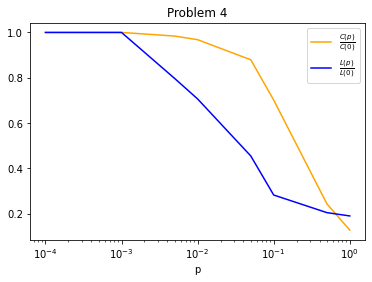

In [180]:
probas, c, l = problem4()

Here we can observe the small world effect in action, where the path length decreases quickly, while clustering coefficient remains high for probabilities around 0.1. In this regime, the path length is low while the clustering coefficient is high, meaning that the graph is relatively easily traversable, while still being as densely connected as possible|

# Problem 5

In [ ]:
# Create scale free network
def create_sf(N, M):
    G = nx.Graph()
    for u in range(N):
        G.add_node(u)
        for _ in range(M):
            # Select from the other nodes in the network that are not currently connected to i
            sel = [n for n in G if n not in G[u] and n != u]
            if len(sel) == 0:
                break # Connected to all nodes in the network

            p = np.asarray(G.degree)[:,1][sel]
            if p.sum() == 0:
                # First edge in the network, set the probabilities to 1 to kickstart Pref Attachment
                p[0] = 1
            else:
                p = p/p.sum() # Normalize
            
            v = np.random.choice(sel, p=p)

            G.add_edge(u, v)
    return G


# Create erdos-reyni network
def create_er(N, total_edges, p=0.05):
    G = nx.Graph()
    G.add_nodes_from(np.arange(N))
    while len(G.edges) < total_edges:
        # Create a new edge between two randomly selected not connected nodes
        u, v = np.random.choice(G.nodes, 2)
        if u == v:
            continue
        if (u, v) not in G.edges and np.random.random() < p:
            G.add_edge(u, v)

    return G
